# **Aerofit Case Study using Python Libraries**


## About Case Study

**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as **treadmills, exercise bikes, gym equipment, and fitness accessories** to cater to the needs of all categories of people.


## Business Problem

The market research team at AeroFit wants **to identify the characteristics of the target audience for each type of treadmill** offered by the company, **to provide a better recommendation of the treadmills to the new customers**. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


## Objective

- Create a descriptive analytics **to create a customer profile for each AeroFit treadmill product** by developing appropriate tables and charts.
- For each AeroFit treadmill product, **construct two-way contingency tables and compute all conditional and marginal probabilities** along with their insights/impact on the business.

In [153]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [154]:
#Downloading dataset
!gdown  1WHbQmYbTP8R6pSOojXuLdtUpYrnN6YME

Downloading...
From: https://drive.google.com/uc?id=1WHbQmYbTP8R6pSOojXuLdtUpYrnN6YME
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 40.1MB/s]


In [155]:
#Defining dataset
df = pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Analysing Basic Metrics

In [30]:
df.shape

(180, 9)

Dataset contains 180 rows and 9 columns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 - Product, Gender and Marital Status are **object(string)**
 - Age, Education, Usage, Fitness, Income and Miles are in **int64(integer)**

In [32]:
df.nunique() #Unique values

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [158]:
#Null percentage
100* df.isna().sum()/ len(df)

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

### *Dataset Characteristics*

Dataset contains following columns:-

 - **Product Purchased**: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers
 - **Age** : In years, age of the customer who purchased
 - **Gender**: Gender of the purchased customer
 - **Education**: represented in years
 - **Marital Status**: Single or partnered
 - **Usage**: The average number of times the customer has planned to use the treadmill each week
 - **Fitness**: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
 - **Miles**: The average number of miles the customer expects to walk or run each week
 - **Income**: Annual income of the user in Dollars $

In [157]:
# Statistical Analysis
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## **Non-Graphical Analysis: Value counts and unique attributes**

### Numerical Summary

In [35]:
# Total number of unique Product ids
df['Product'].nunique()

3

In [36]:
# unique list of product ids
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [37]:
# Total number of unique ages
total_uniq_age = df['Age'].nunique()
total_uniq_age

32

In [38]:
# list of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [39]:
# Number of Male and Female customers
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [40]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [41]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [42]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [43]:
# Number of customers counts on Usage
df['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [44]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## *Column summary*
 - KP281, KP481, KP781 are the 3 different products
 - Most commonly purchased treadmill product type is KP281
 - There are 32 unique ages
 - 104 Males and 76 Females are in the customers list
 - 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
 - Highest rated Fitness rating is 3
 - Most customers usage treadmill atleast 3 days per week
 - Majority of the customers who have purchased are Married/Partnered

## **Conversion of Categorical attributes to 'Category'**

In [45]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [46]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Categorization of **Fitness Rating** to following **descriptive categories**


1. Poor Shape
2. Bad Shape
3. Average Shape
4. Good Shape
5. Excellent Shape

In [47]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### *Descriptive Analysis*

 - Total count of all columns is 180
 - **Age**: Mean age of the customer is 28 years, half of the customer's mean age is 26.
 - **Education**: Mean Education is 15 with maximum as 21 and minimum as 12.
 - **Usage**: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
 - **Fitness**: Average rating is 3.3 on a scale of 1 to 5.
 - **Income** (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K
 - **Miles**: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.

## **Statistical Summary**

In [48]:
# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

 - **44.44%** of customers bought **KP281** product type
 - **33.33%** of customers bought **KP481** product type
 - **22.22%** of customers bought **KP781** product type

In [49]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Male      57.78
Female    42.22
Name: Gender, dtype: float64

 - **57.78%** of customers are **Male** and **42.22%** customers are **Female**

In [50]:
# Customers Marital Status (listed in %)
marital_status = df['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

 - **59.44%** of customers are **Married/Partnered**
 - **40.56%** of customers are **Single**

In [51]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


 - **Around 39%** of customers use **3 days per week**
 - **Less than 2%** of customers use **7 days per week**

In [52]:
# Customer rating of their fitness (listed in %)
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


 - **More than 53%** of customers have rated themselves as **average in fitness** (rated 3)
 - **14%** of customers have rated their fitness less than average
 - **Over 17%** of customers have **peak fitness ratings**

## **Visual Analysis - Univariate & Bivariate**

### Univariate Analysis

**For Continous Variable(s):Distplot, countplot, histogram for univariate analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

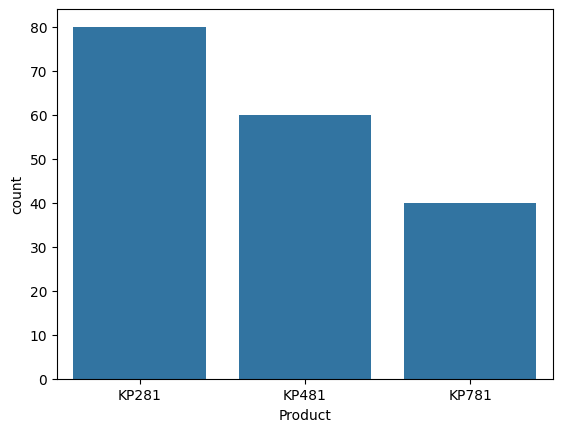

In [53]:
# Product Analysis - count plot
sns.countplot(data=df,x='Product')
plt.show

 - **KP281** is the most commonly purchase product type
 - **KP481** is the second most top product type purchased
 - **KP781** is the least purchased product type

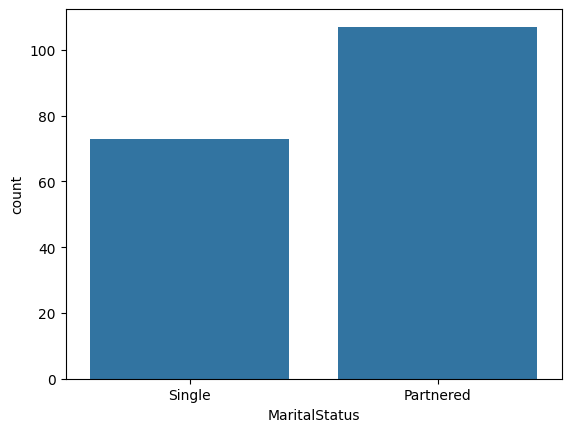

In [54]:
# Marital Status Analysis - Count plot
sns.countplot(data=df,x='MaritalStatus')
plt.show()

 - Most products purchased by **couples/Married/Partnered** customer category

<function matplotlib.pyplot.show(close=None, block=None)>

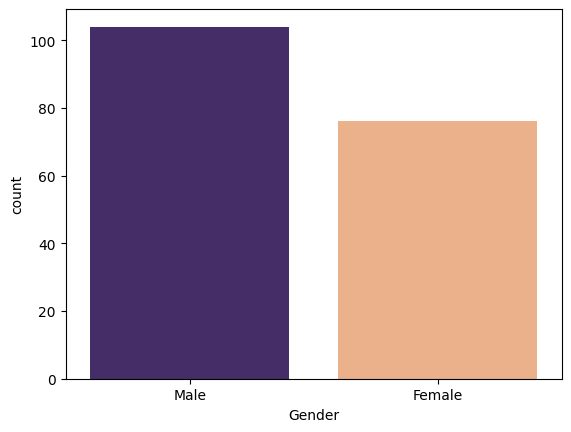

In [55]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])
plt.show

 - Most products purchased by Males, females are less interested in the product compared to Males

<function matplotlib.pyplot.show(close=None, block=None)>

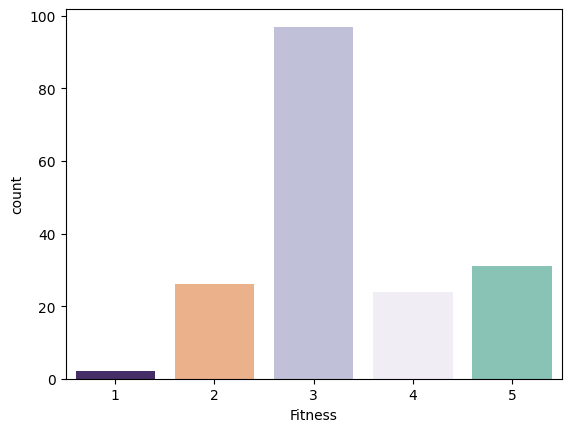

In [56]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness',palette=['#432371',"#FAAE7B","#bcbddc", "#efedf5",'#7fcdbb'])
plt.show

 - More than 90 customers have rated their physical fitness rating as **Average**
 - **Excellent shape is the second highest** rating provided by the customers

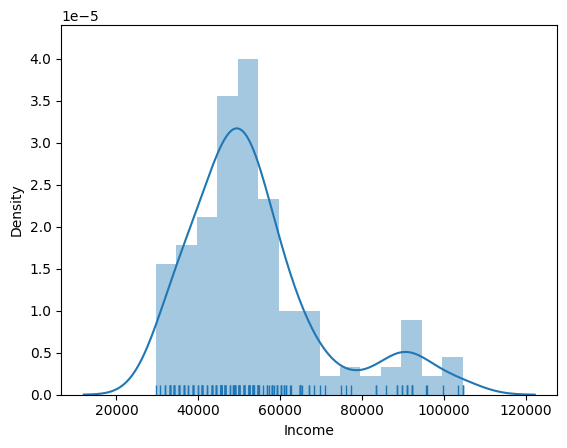

In [57]:
# Income Analysis - Distplot
sns.distplot(df.Income,rug=True)
plt.show()

 - Most of customers who have purchased the product have a **average income between 40K to 60K**
 - Average Income density is over 3.0

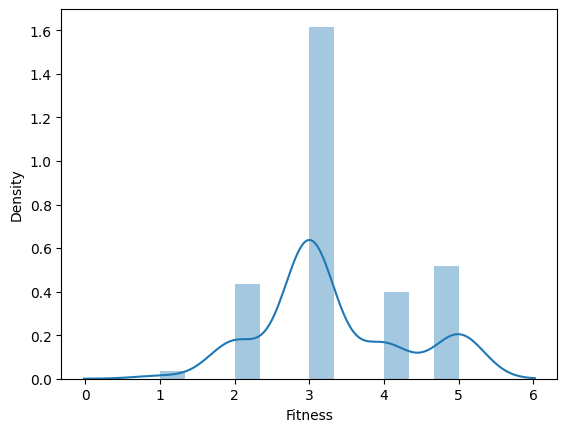

In [58]:
# Fitness Rating Analysis - Distplot
sns.distplot(df.Fitness)
plt.show()

 - Over 1.5 density customer population have rated their physical fitness rating as **Average**
 - Second highest customer population density have rated Excellent shape as their fitness rating

<Axes: xlabel='Income', ylabel='Count'>

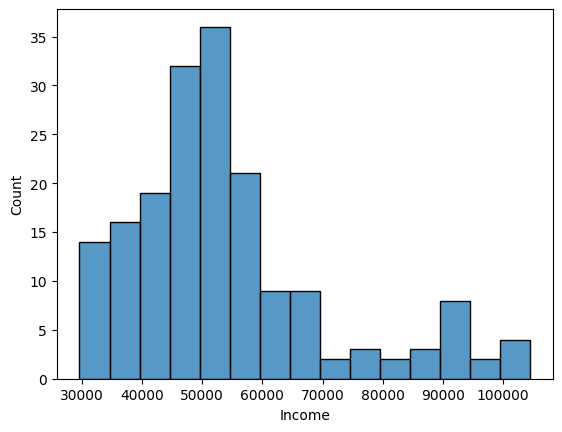

In [59]:
# Income Analysis - Histogram
sns.histplot(data=df,x='Income')

 - More than 35 customers earn 50-55K per year
 - More than 30 customers earn 45-50K per year
 - More than 20 customers earn 55-60K per year

<Axes: xlabel='Education', ylabel='Count'>

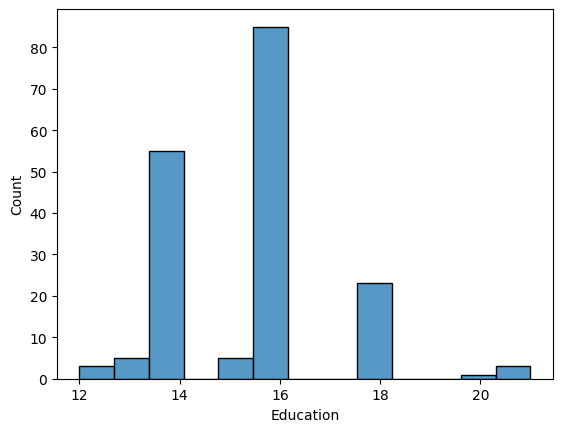

In [60]:
# Education Analysis - Histogram
sns.histplot(data=df,x='Education')

 - Highest number of customers have 16 as their Education
 - 14 is the second highest education among the customers
 - 20 is the least education among the customers

<Axes: xlabel='Usage', ylabel='Count'>

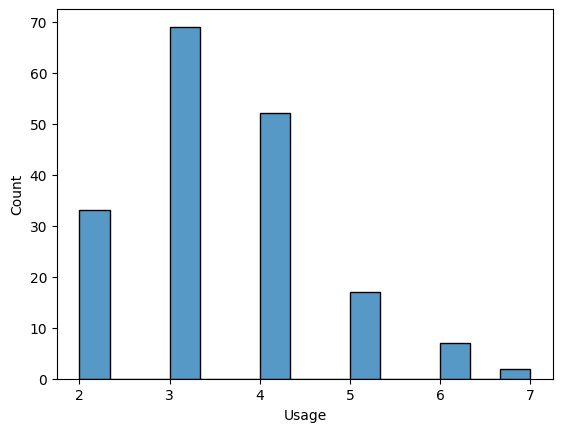

In [61]:
# Usage Analysis - Histogram
sns.histplot(data=df,x='Usage')

 - 3 days per week is the most common usage among the customers
 - 4 days and 2 days per week is the second and third highest usage among the customers
 - Very few customers use product 7 days per week

<Axes: xlabel='Fitness', ylabel='Count'>

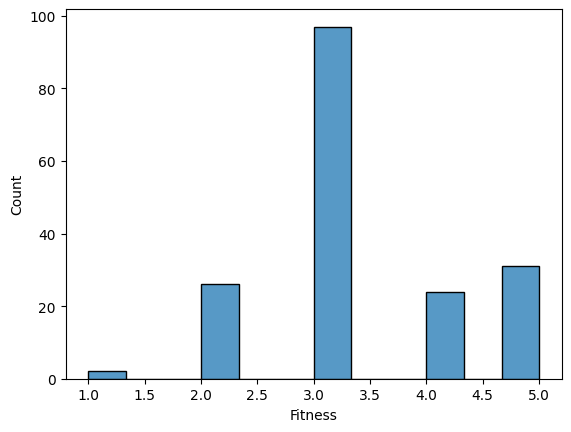

In [62]:
# Fitness Analysis - Histogram
sns.histplot(data=df,x='Fitness')

 - Average shape is the most rating customers have given for fitness rating
 - Around 40 customers have stated Excelled Shape as fitness rating

**For categorical variable(s): Boxplot**

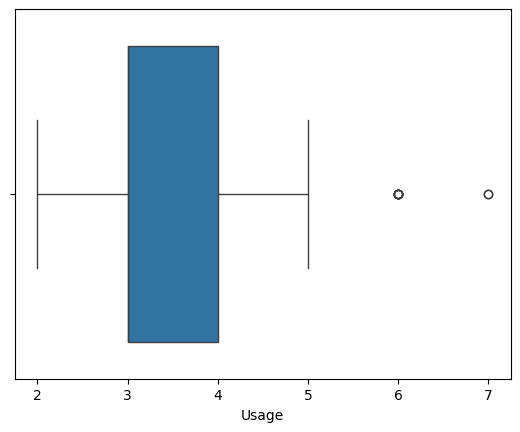

In [63]:
# Usage Analysis - Box plot
sns.boxplot(data=df,x='Usage')
plt.show()

 - 3 to 4 days is the most preferred usage days for customers
 - 6 and 7 days per week is roughly the usage days for few customers (**Outliers**)

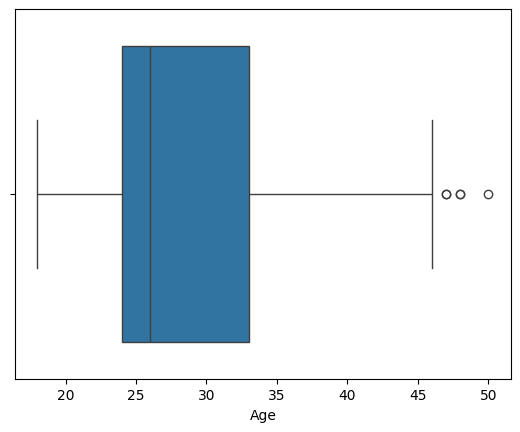

In [64]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')
plt.show()

 - 23 to 34 is the most common customer age group that has purchased the product
 - Above 45 years old customers are very few compared to the young age group given in the dataset

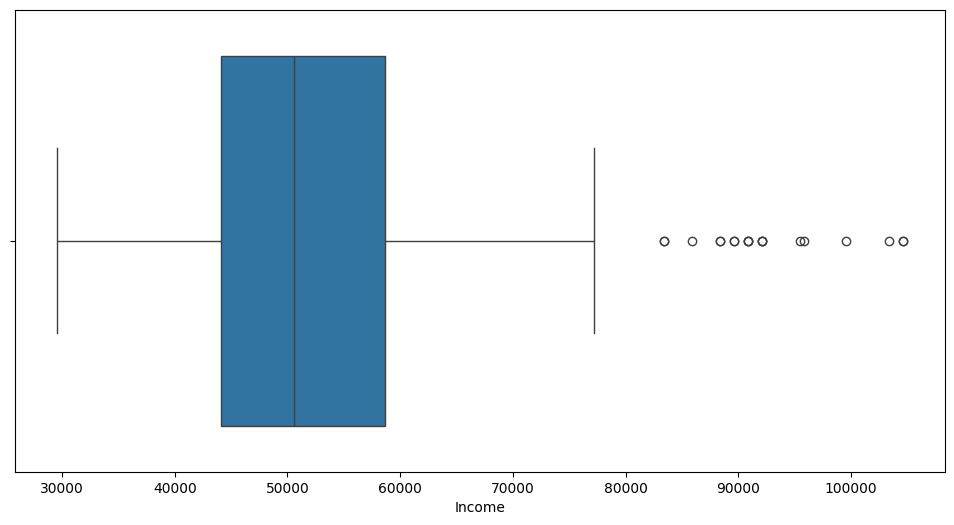

In [65]:
# Income Analysis - Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Income')
plt.show()

 - Few customers have income above 80K per annum(Outliers)
 - Most customers earn from 45K to around 60K per annum

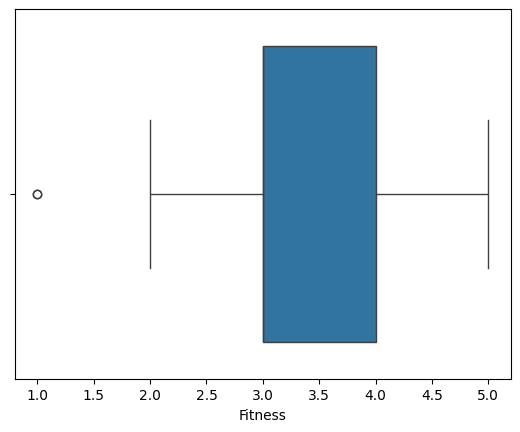

In [66]:
# Fitness Rating Analysis - Box plot
sns.boxplot(data=df,x='Fitness')
plt.show()

 - Couple of customers have rated their fitness rating as 1 - Poor Shape
 - Most customers have rated fitness rating as 3.0 to 4.0

**For correlation: Heatmaps, Pairplots**

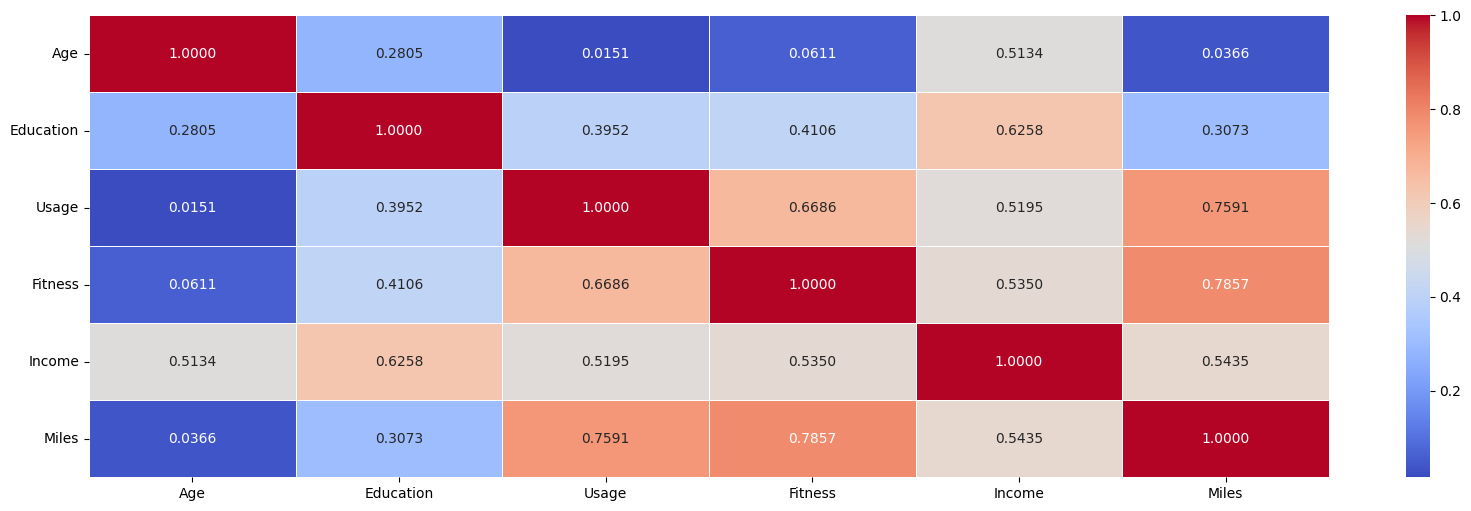

In [67]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated


 - Correlation between Age and Miles is 0.03
 - Correlation between Education and Income is 0.62
 - Correlation between Usage and Fitness is 0.66
 - Correlation between Fitness and Age is 0.06
 - Correlation between Income and Usage is 0.51
 - Correlation between Miles and Age is 0.03

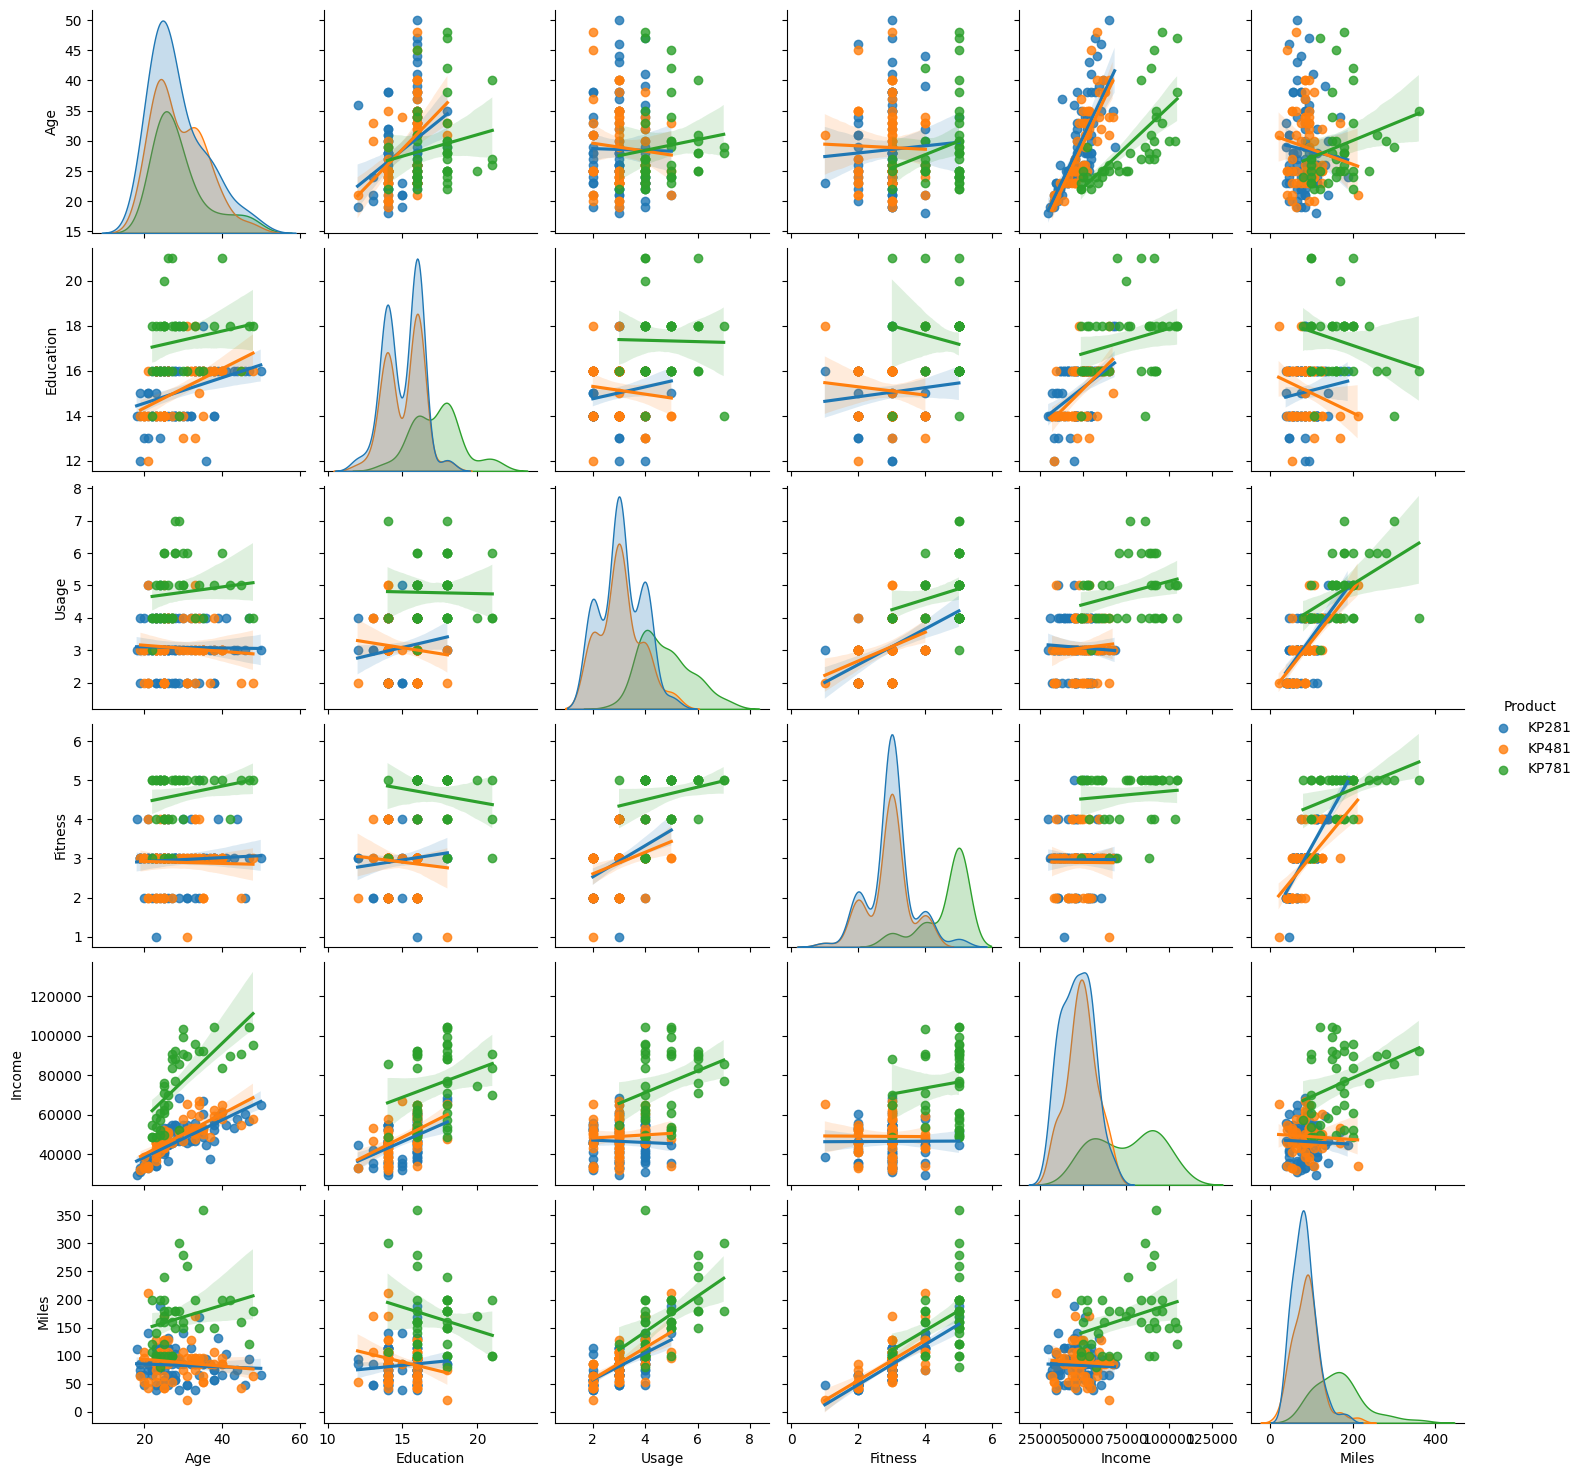

In [68]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

In the above pairplot the correlation with products and different attributes are as similar to previous observation

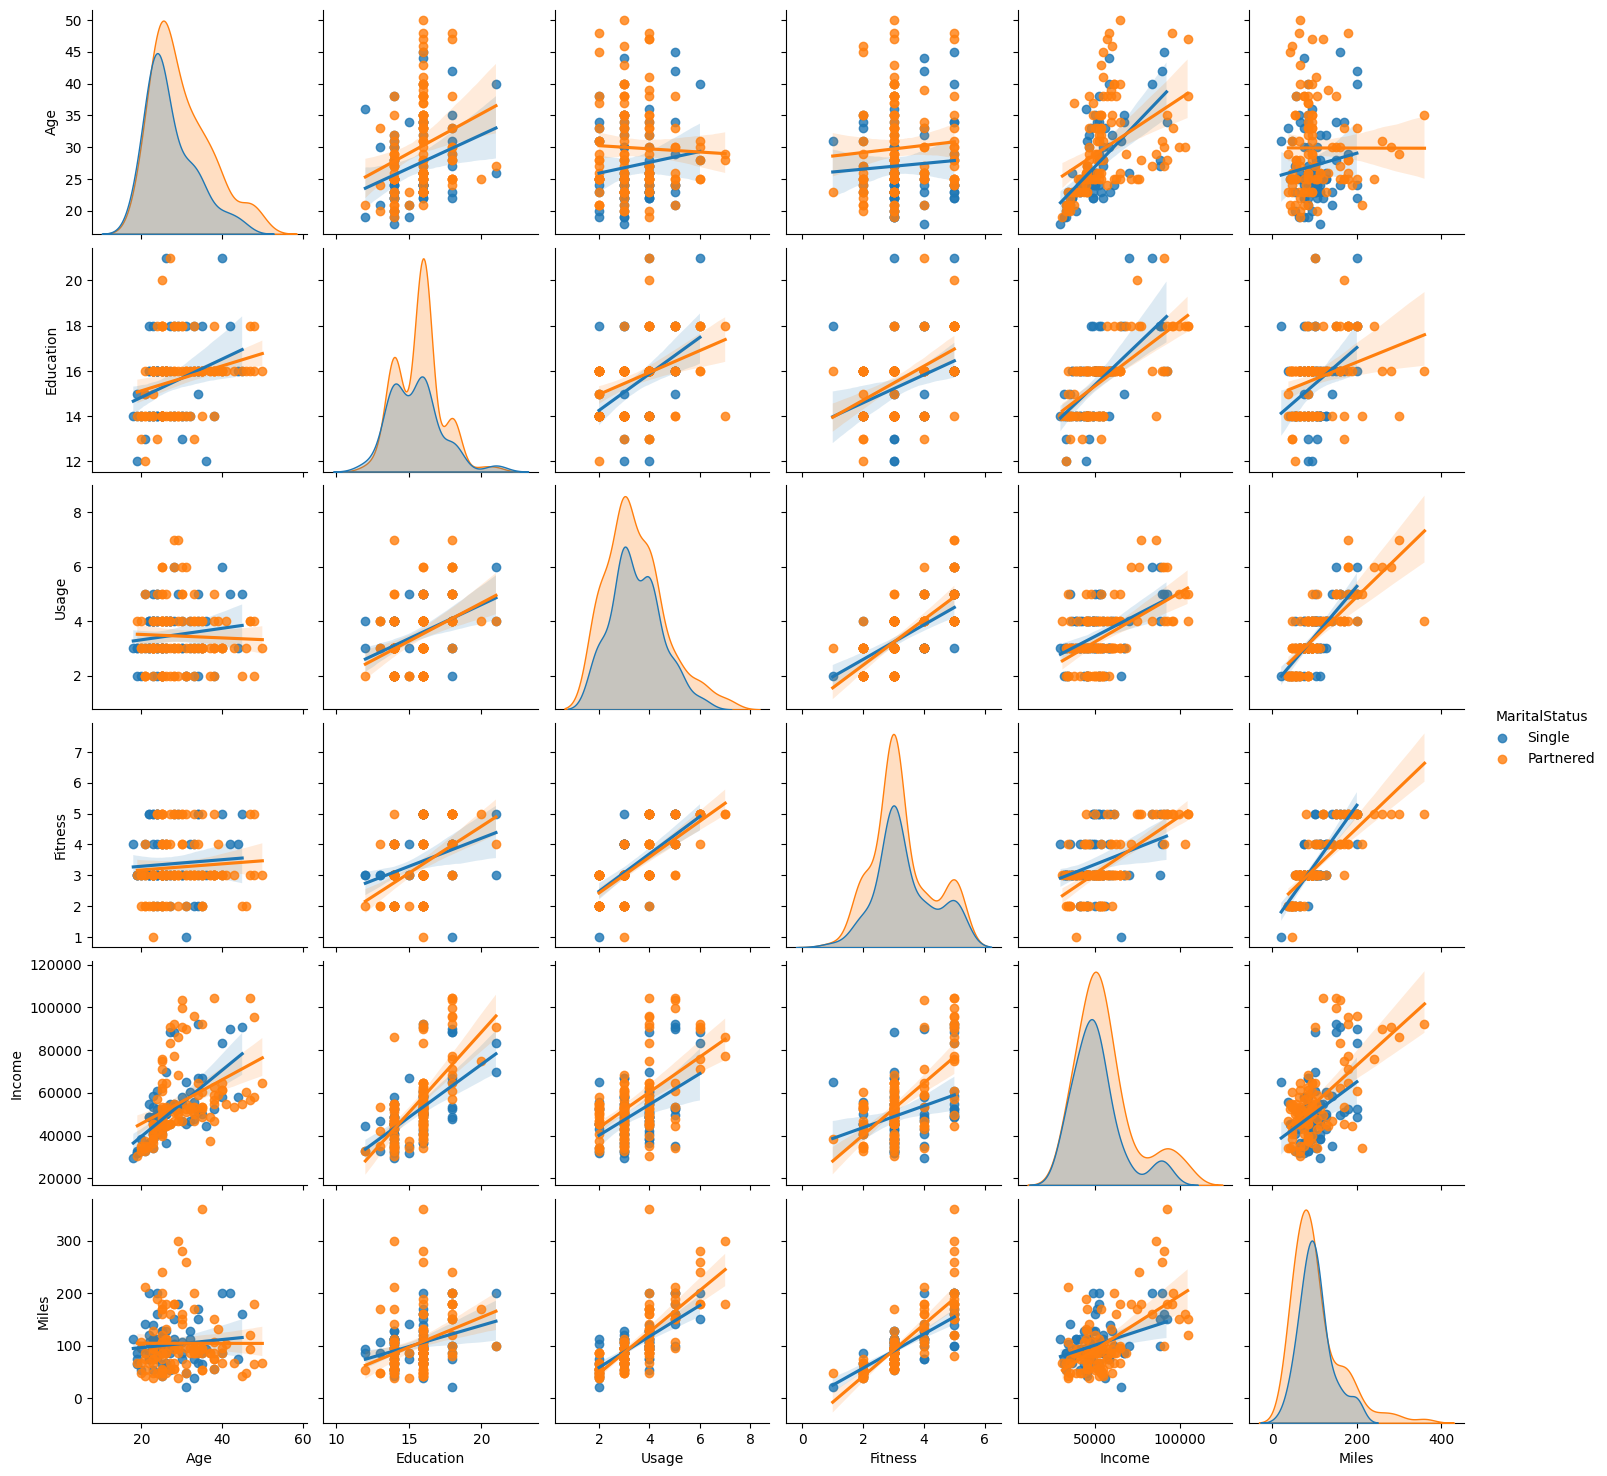

In [69]:
# Marital Status - pair plot
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

In the above pair plot the correlation with other attributes are pivotted around the marital status of the customer

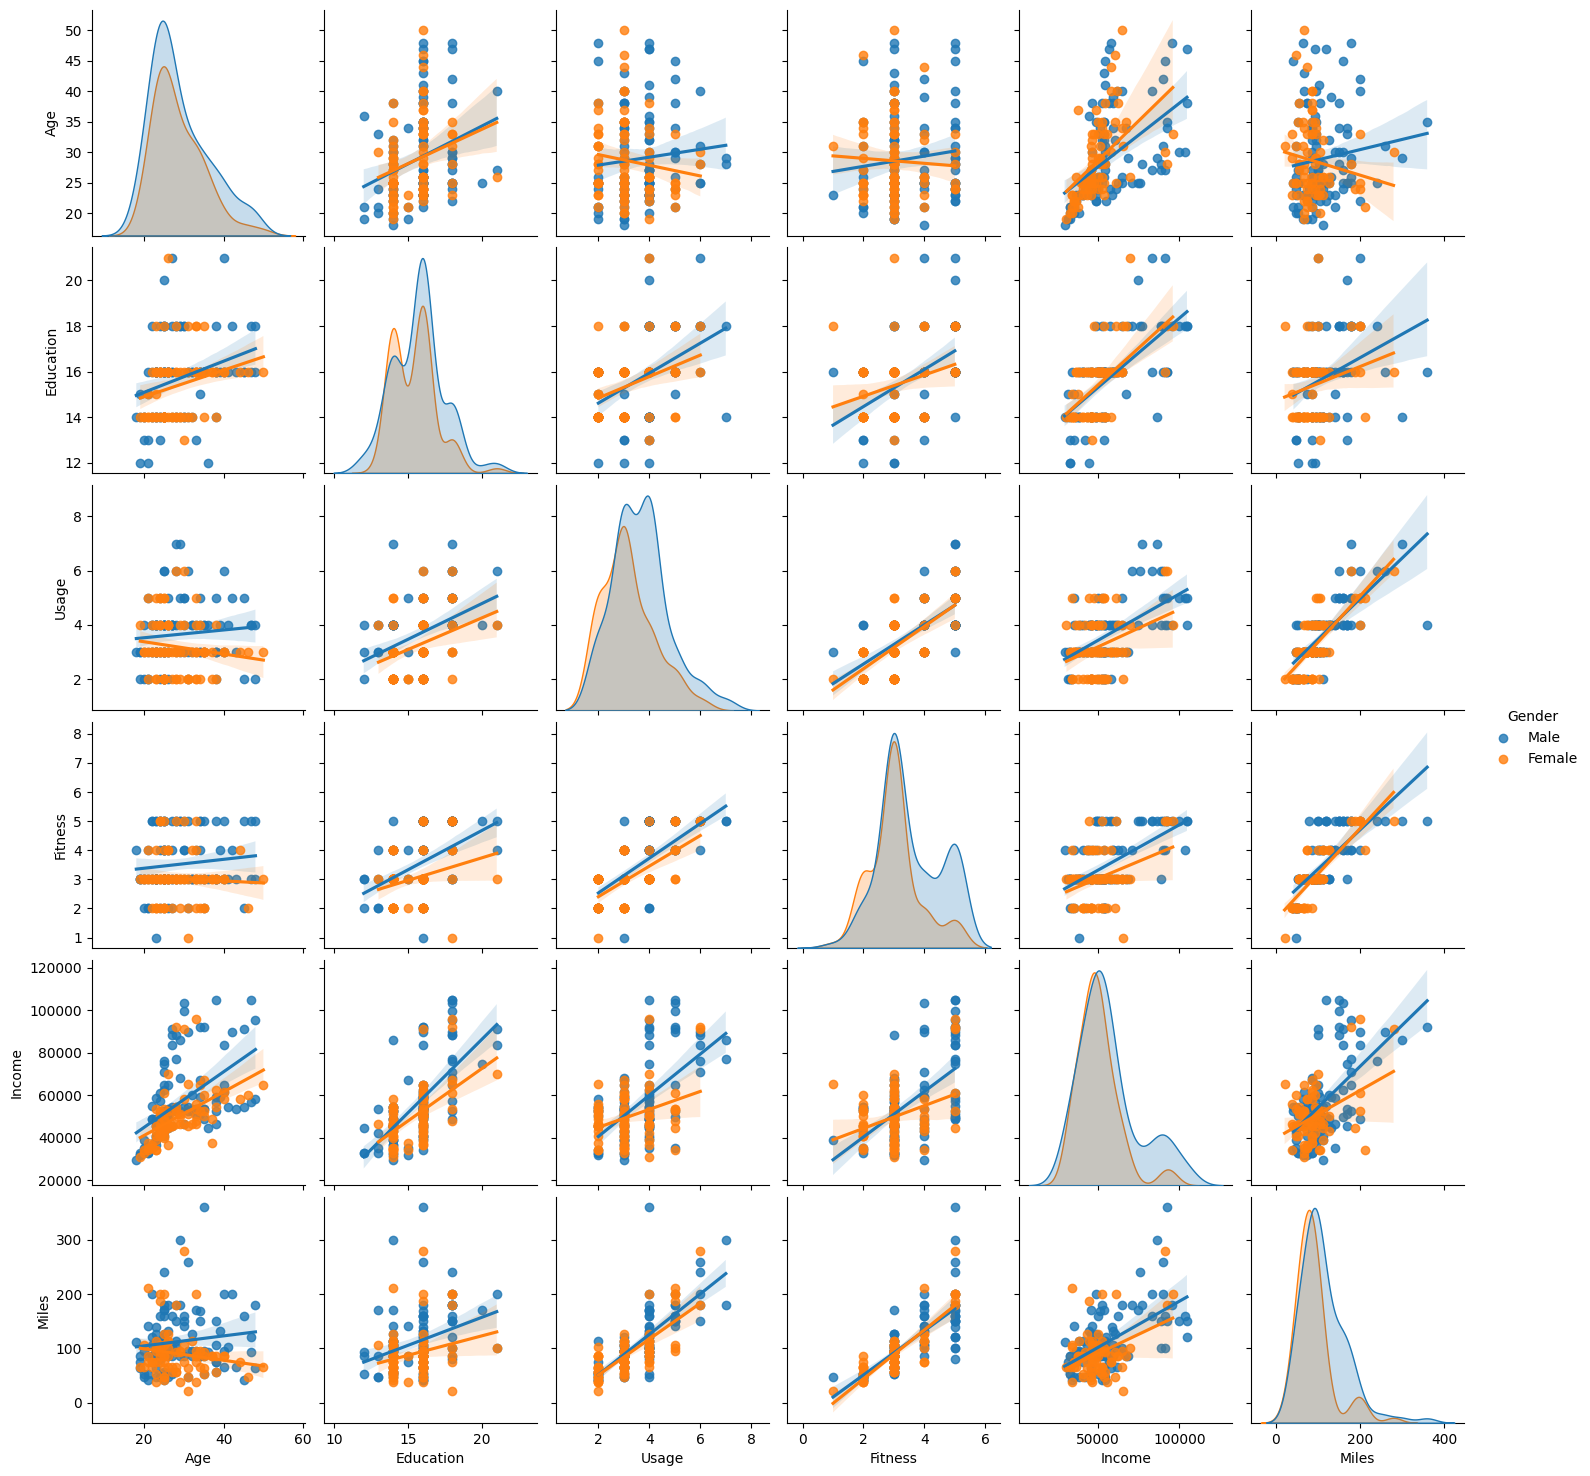

In [70]:
# Gender Analysis - Pair Plot
sns.pairplot(df,hue='Gender',kind='reg')
plt.show()

Here the pair plot's correlation is same as the above mentioned heatmap

### Bivariate Analysis

In [71]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

 - Mean usage for product KP281 is 3.08
 - Mean usage for product KP481 is 3.06
 - Mean usage for product KP781 is 4.77

In [72]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

 - Mean Age of the customer who purchased product KP281 is 28.55
 - Mean Age of the customer who purchased product KP481 is 28.90
 - Mean Age of the customer who purchased product KP781 is 29.10

In [73]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

 - Mean Education qualification of the customer who purchased product KP281 is 15.03
 - Mean Education qualification of the customer who purchased product KP481 is 15.11
 - Mean Education qualification of the customer who purchased product KP781 is 17.32

In [74]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

 - Customer fitness mean for product KP281 is 2.96
 - Customer fitness mean for product KP481 is 2.90
 - Customer fitness mean for product KP781 is 4.62

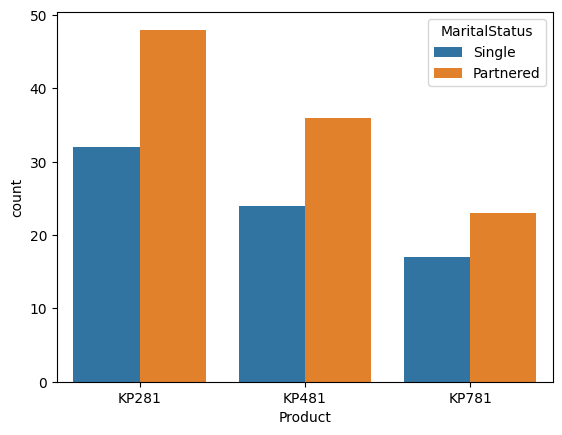

In [75]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()

From the above countplot
 - KP281 is the most preferred product among customers
 - KP481 is the second most preferred product among the customers
 - Between Singles and Partnered, Partnered customers are the major product purchasers

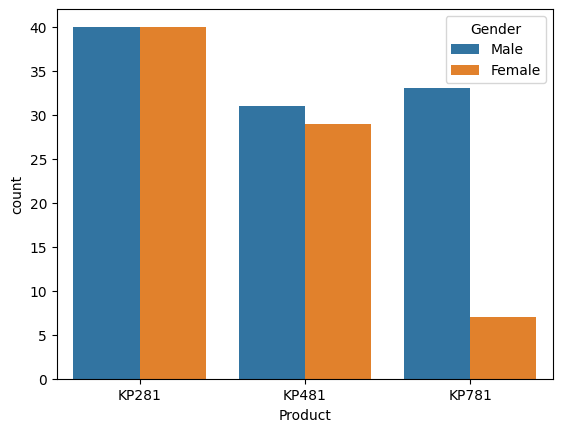

In [76]:
# Product purchased among Male and Female
sns.countplot(data=df,x='Product',hue='Gender')
plt.show()

 - KP281 Product is the equally preferred by both male and female genders
 - KP781 Product is mostly preferred among the Male customers
 - Overall Male customers are the highest product purchasers

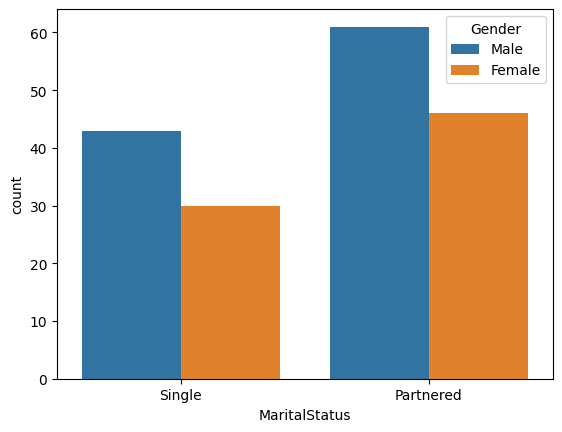

In [77]:
# Count among Gender and their Marital Status
sns.countplot(data=df,x='MaritalStatus',hue='Gender')
plt.show()

 - Partnered customers are the most buyers of aerofit product
 - Out of both Single and Partnered customers, Male customers are significantly high
 - Female customers are considerably low compared to Male customers

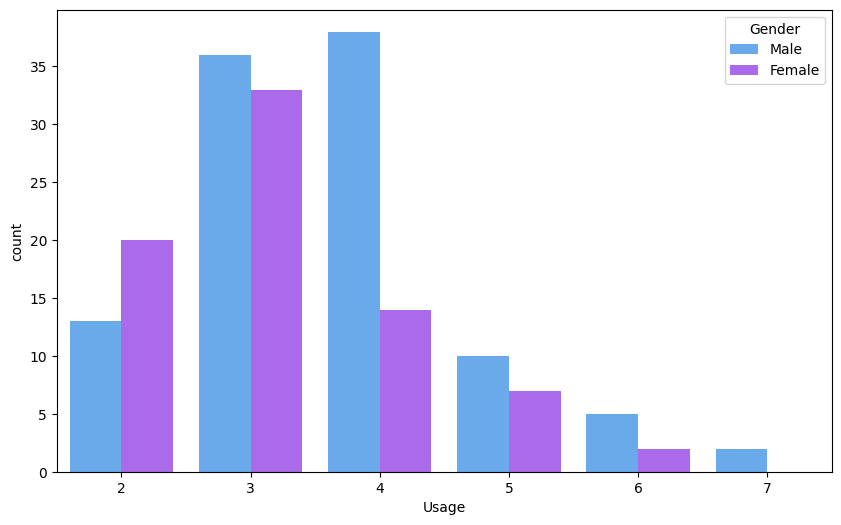

In [78]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender',palette='cool')
plt.show()

 - Among Male and Female genders, Male's usage is 4 days per week
 - Female customers mostly use 3 days per week
 - Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

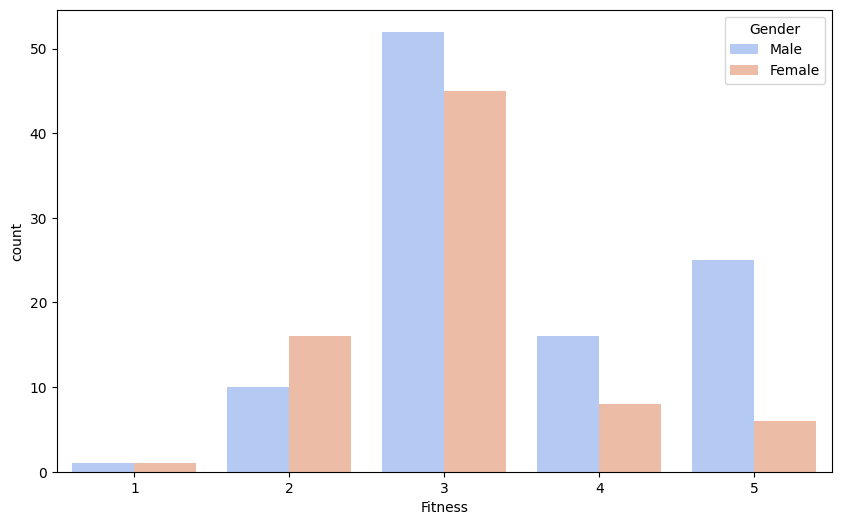

In [79]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Fitness',hue='Gender',palette='coolwarm')
plt.show()

 - Among the fitness rating both Male and Female most have rated as average
 - Significant number of Male customers are at Excellent shape compared to Female customers

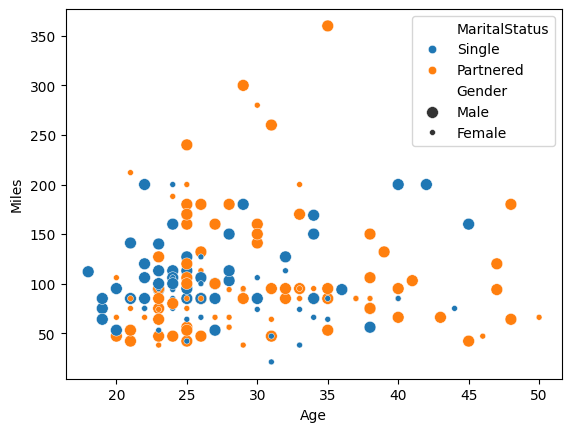

In [85]:
# Joint Histogram with KDE plot
sns.scatterplot(x = df["Age"], y = df["Miles"], hue = df["MaritalStatus"], size = df["Gender"])
plt.show()

 - Majority of the customer Age group is between 20 to mid 30s who have rated atleast average

 - Above Joint plot describes the relationship between the customer age and their gender grouping.
 - Product is not familiar with older or middle age womens

<Axes: xlabel='Education', ylabel='Age'>

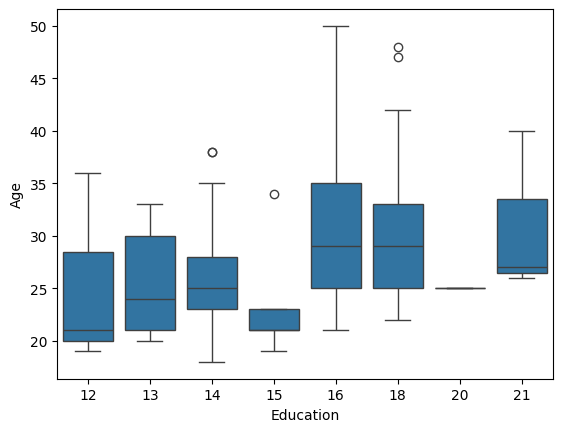

In [89]:
sns.boxplot(x='Education',y='Age',data=df)

 - Above box plot shows Education data against Age of the customer

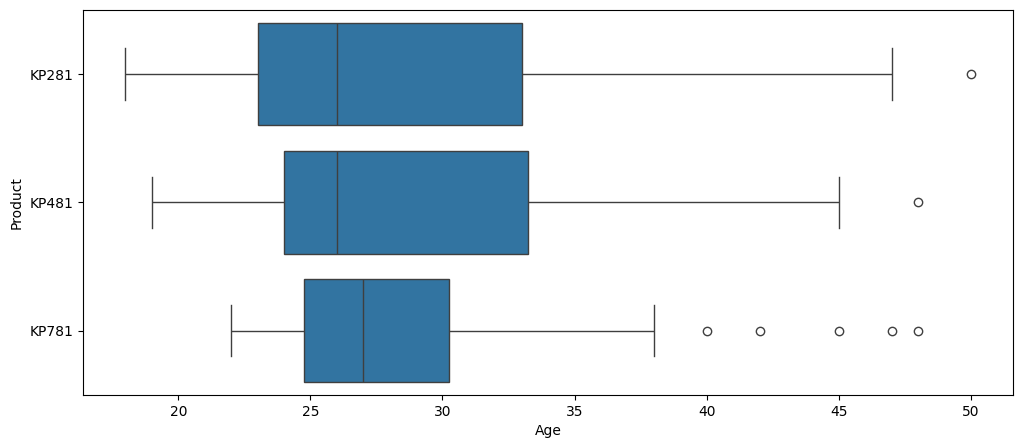

In [90]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=df)
plt.show()

 - Roughly few customers with age above 40 use product KP781
 - Most of the customers are comfortable with KP281 product type
 - KP481 is the second highest popular product among the younger side of the customer

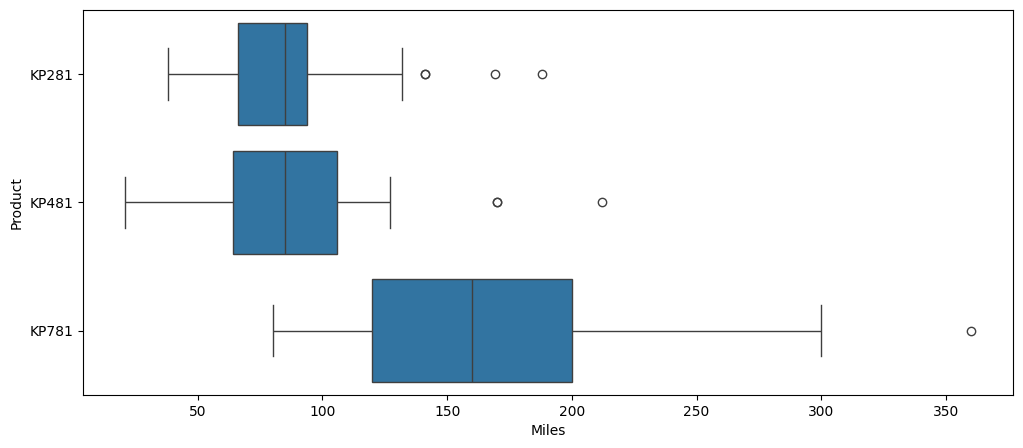

In [91]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=df)
plt.show()

 - Customers with product KP781, has been able to cover more miles than other two product types
 - KP481 product is the second most highest miles covering product among the customers
 - KP281 product customer had covered less distance compared with other two product types

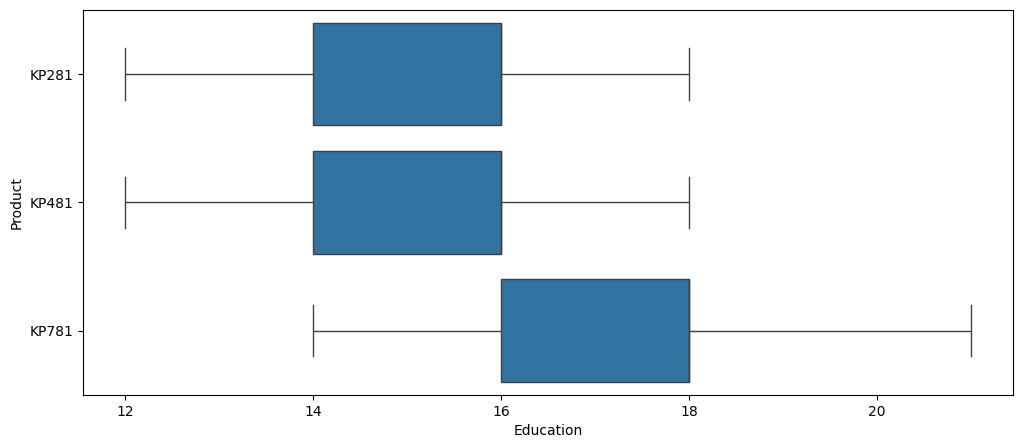

In [92]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=df)
plt.show()

 - Customers with Higher education of 16 to 18 have preferred mostly product type KP781
 - Customers with education between 14 to 16 prefer KP281 and KP481 equally

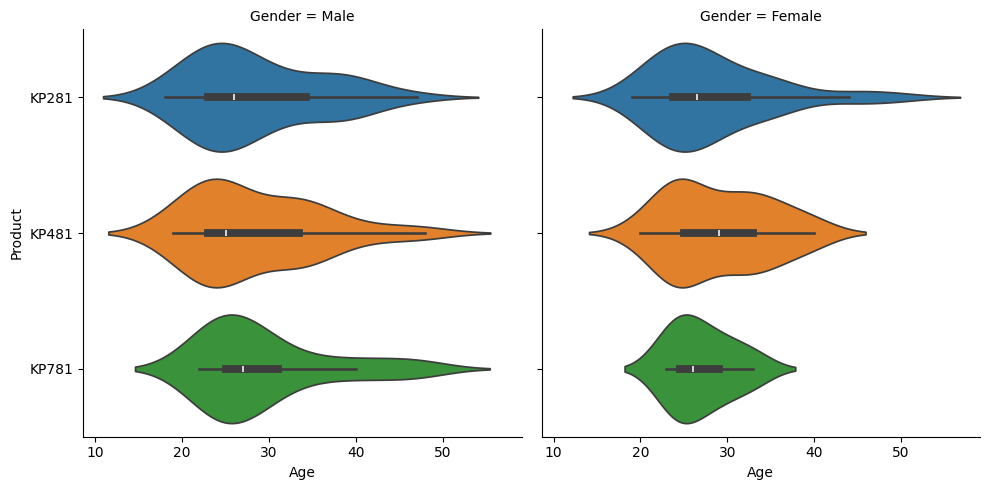

In [97]:
# Product used among age group seggregated by Gender
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=df,kind='violin')
plt.show()

 - From the above catplot, male customers are equally distributed among the three product types
 - Female customers tend to use product KP281 and KP481 more than advanced KP781 product
 - Female customers tend to prefer less complicated products than their male counterparts

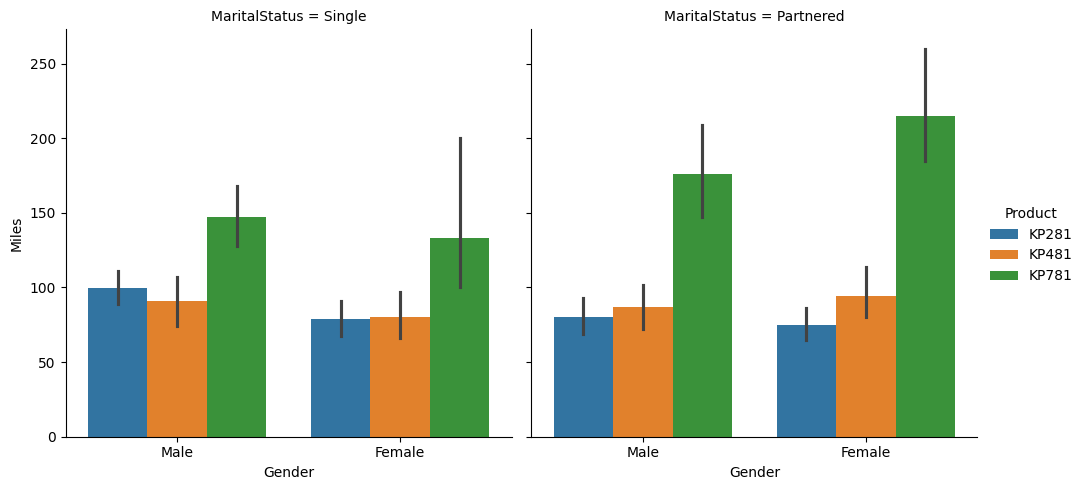

In [98]:
# Miles covered in each product by gender and their marital status
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')
plt.show()

 - KP781 is more populat among the single and Partnered customers
 - Among the both marital statuses, Single female does not prefer much of the products.
 - Partnered Female bought KP781 treadmill compared to Partnered Male.
 - Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
 - Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
 - There are more single Males buying treadmill than single Females.
 - Single Male customers bought KP781 treadmill compared to single Female.
 - Partnered customers are more than Single customers.

## **Missing Value & Outlier Detection**

In [99]:
df.isna().sum()

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

No Null values found in any columns

In [100]:
df.duplicated().sum()

0

No duplicates have been observed

### **Outliers Handling**


Outliers for other categorical data are mentioned inline with the respective analysis

In [126]:
#CLipping data at min 5 and max 25 Percentile
df["Miles"] = np.clip(df["Miles"], np.percentile(df["Miles"], 5), np.percentile(df["Miles"], 95))

## **Representing Probabilities**

In [127]:
df.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

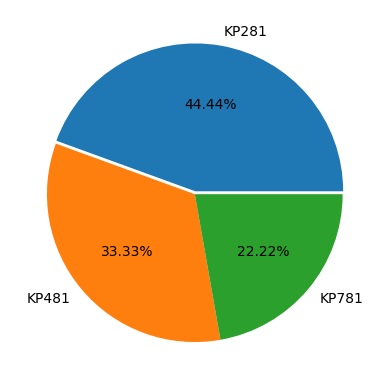

In [134]:
plt.pie(df["Product"].value_counts(), autopct = '%.2f%%', labels = df["Product"].value_counts().index, explode = (0.02,0,0))
plt.show()

Probability of buying **KP281, KP481 & KP781** are **0.44, 0.33 & 0.22** respectively

In [128]:
df.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

 - Probability of Male customer is 0.57
 - Probability of Female customer is 0.42

In [104]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

 - Probability of Married/Partnered is 0.59
 - Probability of Single is 0.40

## **Probability for each product for the both genders**

In [105]:
def gender_Probability(gender,df):
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")

df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


## **Probability of each product for given Marital Status**

In [106]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")

df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


## **Product vs Age Analysis**

In [114]:
pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [115]:
# Conditional and Marginal Probabilities with product type and age group
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


## **Conditional and Marginal Probabilities**

**Two-Way Contingency Table**

**Marginal Probabilities**

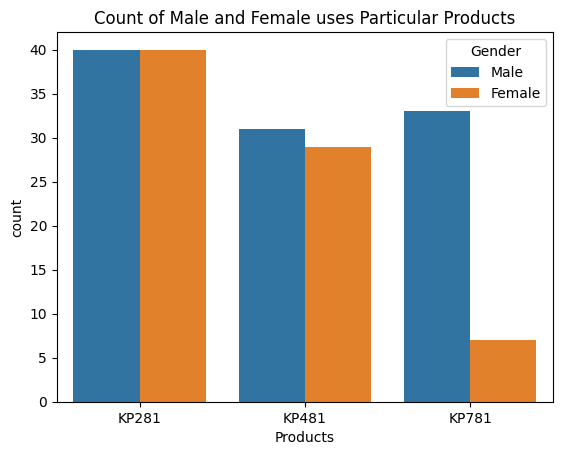

In [122]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [123]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [124]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

 - Probability of Male Customer Purchasing any product is : 57.77 %

 - Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

 - product KP281 is : 44.44 % (cheapest / entry level product)

 - product KP481 is : 33.33 % (intermediate user level product)

 - product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

In [125]:
# Conditional Probabilities
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

## **Customer Profiling for Each Product**

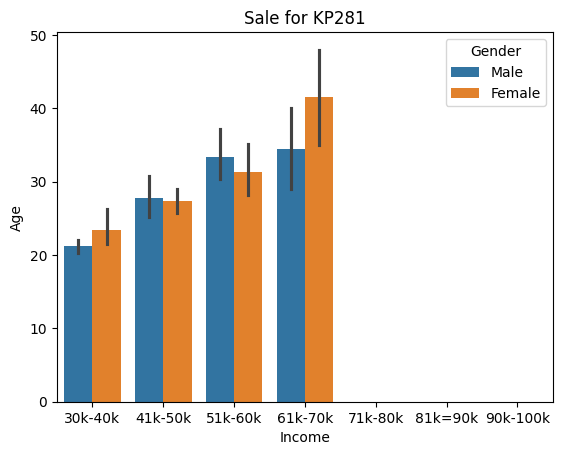

In [129]:
df["Income"] = pd.cut(
    labels = ["30k-40k", "41k-50k", "51k-60k", "61k-70k", "71k-80k", "81k=90k", "90k-100k"],
    bins = [30000,40000,50000,60000,70000,80000,90000,100000],
    x = df["Income"]
)

df_kp281 = df.loc[df["Product"]=="KP281"]

sns.barplot(x = "Income",hue = "Gender",y = "Age", data = df_kp281)
plt.title("Sale for KP281")
plt.show()

**KP281**

 - Easily affordable entry level product, which is also the maximum selling product.


 - KP281 is the most popular product among the entry level customers.


 - This product is easily afforded by both Male and Female customers.


 - Average distance covered in this model is around 70 to 90 miles.


 - Product is used 3 to 4 times a week.


 - Most of the customer who have purchased the product have rated Average shape as the fitness rating.


 - Younger to Elder beginner level customers prefer this product.


 - Single female & Partnered male customers bought this product more than single male customers.


 - Income range between 39K to 53K have preferred this product.


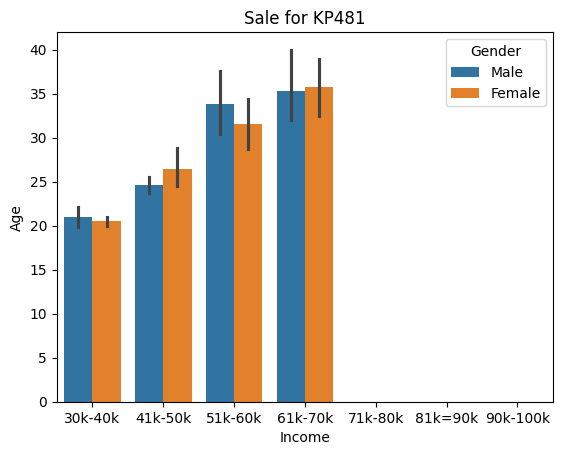

In [130]:
df_kp481 = df.loc[df["Product"]=="KP481"]

sns.barplot(x = "Income",hue = "Gender",y = "Age", data = df_kp481)
plt.title("Sale for KP481")
plt.show()



**KP481**

 - This is an Intermediate level Product.


 - KP481 is the second most popular product among the customers.


 - Fitness Level of this product users varies from Bad to Average Shape depending on their usage.


 - Customers Prefer this product mostly to cover more miles than fitness.


 - Average distance covered in this product is from 70 to 130 miles per week.


 - More Female customers prefer this product than males.


 - Probability of Female customer buying KP481 is significantly higher than male.


 - KP481 product is specifically recommended for Female customers who are intermediate user.


 - Three different age groups prefer this product - Teen, Adult and middle aged.


 - Average Income of the customer who buys KP481 is 49K.


 - Average Usage of this product is 3 days per week.


 - More Partnered customers prefer this product.


 - There are slightly more male buyers of the KP481.


 - The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.


 - The buyers of KP481 in Single & Partnered, Male & Female are same.


 - The age range of KP481 treadmill customers is roughly between 24-34 years.

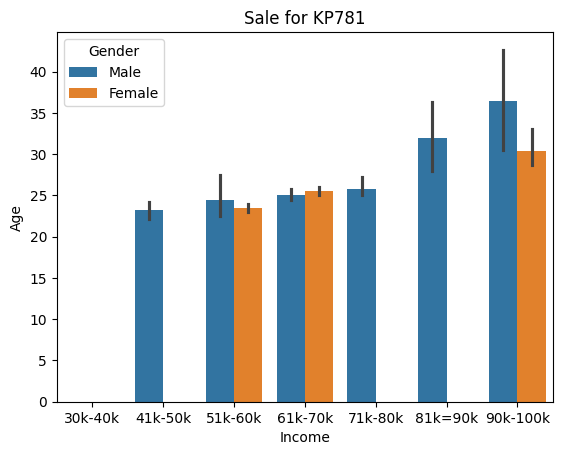

In [132]:
df_kp781 = df.loc[df["Product"]=="KP781"]

sns.barplot(x = "Income",hue = "Gender",y = "Age", data = df_kp781)
plt.title("Sale for KP781")
plt.show()


**KP781**

 - Due to the High Price & being the advanced type, customer prefers less of this product.


 - Customers use this product mainly to cover more distance.


 - Customers who use this product have rated excelled shape as fitness rating.


 - Customer walk/run average 120 to 200 or more miles per week on his product.


 - Customers use 4 to 5 times a week at least.


 - Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.


 - Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).


 - Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.


 - Middle aged to higher age customers tend to use this model to cover more distance.


 - Average Income of KP781 buyers are over 75K per annum


 - Partnered Female bought KP781 treadmill compared to Partnered Male.


 - Customers who have more experience with previous aerofit products tend to buy this product


 - This product is preferred by the customer where the correlation between Education and Income is High.


# **Recommendation**


 - Female who prefer exercising equipments are very low here.  Hence, we should run a marketing campaign on to encourage women to exercise more

 - KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.


 - As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.


 - KP781 product should be promotted using influencers and other international atheletes.


 - Research required for expanding market beyond 50 years of age considering health pros and cons.


 - Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.


 - KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.


 - Target the Age group above 40 years to recommend Product KP781.